# Particule Swarm Optimization
----
---

---

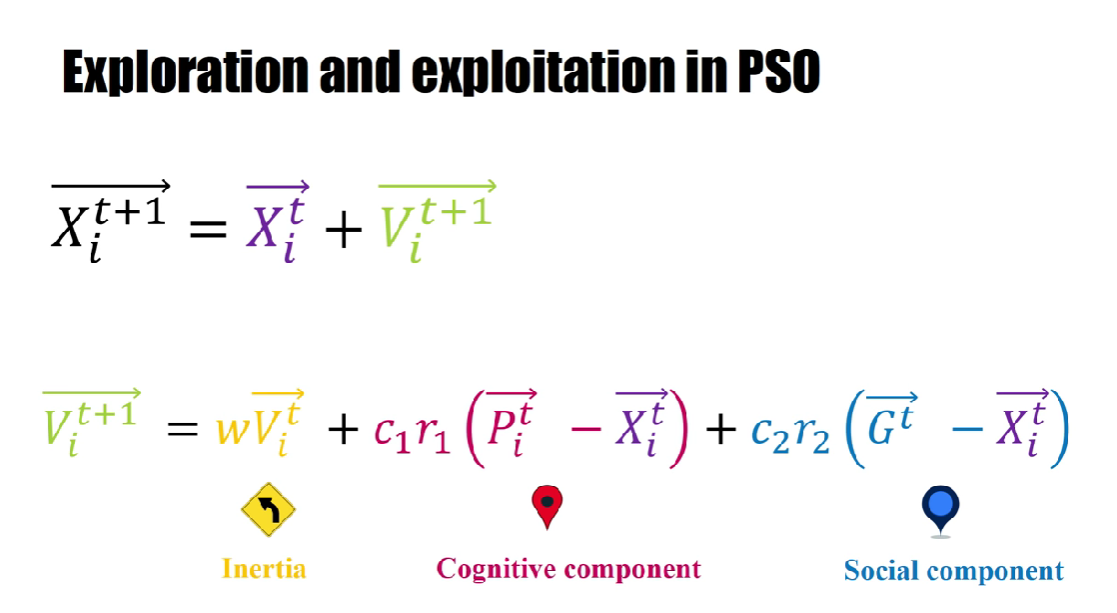


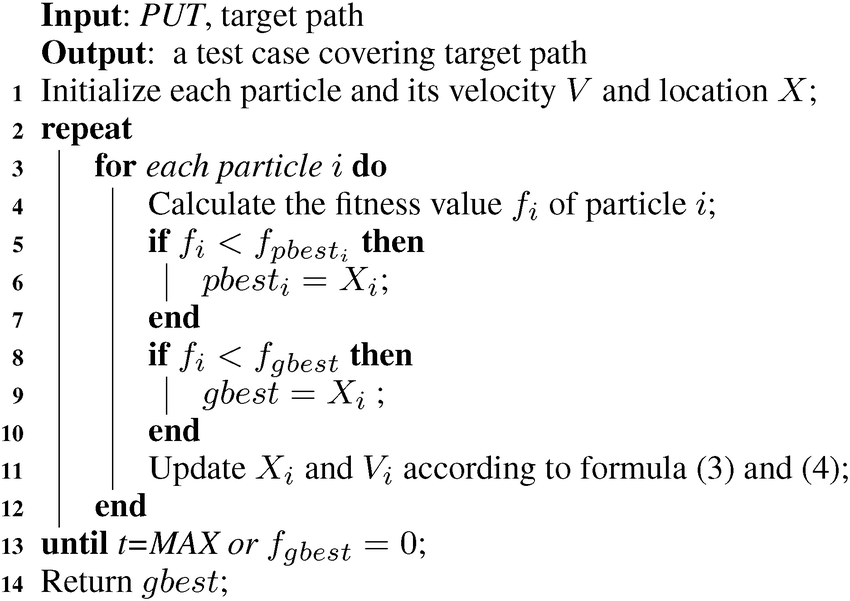

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
class Particle(object):
    def __init__(self):
        self.positions = []
        self.velocities = []
        self.fitness = 0
        
    def set_fitness(self, value):
        self.fitness = value
    
    def validate_bounds(self, lower_bound, upper_bound):
        for i in range(len(self.positions)):
            if self.positions[i] < lower_bound[i] or self.positions[i] > upper_bound[i]:
                self.positions[i] = random.uniform(lower_bound[i], upper_bound[i])
  
            

In [3]:
def initialize_swarm(size, lower_bound, upper_bound):
    num_dimensions = len(lower_bound)
    swarm = []
    for _ in range(size):
        particle = Particle()
        for j in range(num_dimensions):
            particle.positions.append(np.random.uniform(lower_bound[j], upper_bound[j]))
            particle.velocities.append(np.random.uniform(lower_bound[j], upper_bound[j]))
        swarm.append(particle)

    
    return swarm

In [4]:
def evaluate_swarm(swarm, function):
    for p in swarm:
        p.fitness = function(p.positions) 

In [42]:
def best_solution(swarm):
    fitness = swarm[0].fitness
    best = swarm[0]
    for particle in swarm:
        if particle.fitness < fitness: # si fuera maximizar sw.fitness > fitness
            best = particle
            fitness = particle.fitness
    return best

In [6]:
def print_swarm(swarm):
    for sw in swarm:
        print(sw.positions, '> ', sw.fitness)

In [7]:
def pso_algorithm(w, c1, c2, lower, upper, size_swarm, iterations, f):
    dimensions = len(lower)
    #Initialize the swarm
    x = initialize_swarm(size_swarm, lower, upper)
    #Evaluate the swarm
    evaluate_swarm(x, f)

    #print_swarm(x)

    y = x[:]
    y_best = best_solution(y)
    #print 'BEST ', y_best.X, '>>> ', y_best.fitness

    it = 0
    while it < iterations: #la mejor y la peor sean muy parecidas
        for i in range(len(x)): # x es el swarm
            particle = x[i]
            for j in range(dimensions):
                #Calcular la velocidad
                r1 = np.random.rand() # uniform random number r1
                r2 = np.random.rand() # uniform random number r2
                particle.velocities[j] = w * particle.velocities[j] + c1 * r1 * (y[i].positions[j] - particle.positions[j]) + c2 * r2 * (y_best.positions[j] - particle.positions[j])
                #Actualizar la posicion de particle.X
                particle.positions[j] = particle.positions[j] + particle.velocities[j]

            particle.validate_bounds(lower, upper)
                
            #Evaluar la nueva posicion de X
            particle.fitness = f(particle.positions)
            
            if particle.fitness <= y[i].fitness:
                y[i] = particle
            if particle.fitness <= y_best.fitness:
                y_best = particle
            #print 'solution ', y_best.X, '>>> ', y_best.fitness
            x[i] = particle
        
        it +=1

    return y_best

In [10]:
def function1(x):
    # -5 <= x[0], x[1] <= 10    min(3,0.5)
    #(1.5 - x*(1-y))**2 + (2.25-x*(1-y**2))**2 + (2.625-x*(1-y**3))**2
    return (1.5 - x[0]*(1-x[1]))**2 + (2.25-x[0]*(1-x[1]**2))**2 + (2.625-x[0]*(1-x[1]**3))**2


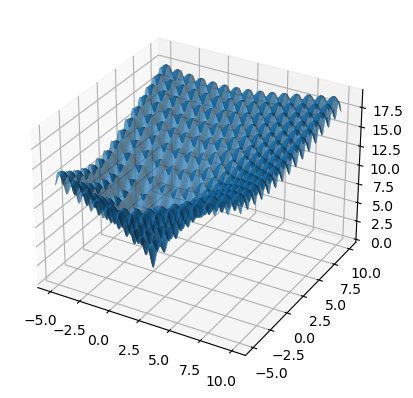

In [11]:
def ackley(x):
    n = len(x)
    sum_sq = 0
    cos_term = 0
    for i in range(n):
      sum_sq += x[i]**2
      cos_term += np.cos(2 * np.pi * x[i])
    return -20 * np.exp(-0.2 * np.sqrt(sum_sq / n)) - np.exp(cos_term / n) + 20 + np.exp(1)

X = np.linspace(-5, 10, 400)
Y = np.linspace(-5, 10, 400)
X, Y = np.meshgrid(X, Y)
Z = ackley([X,Y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0.08,
  antialiased=True)

plt.show()

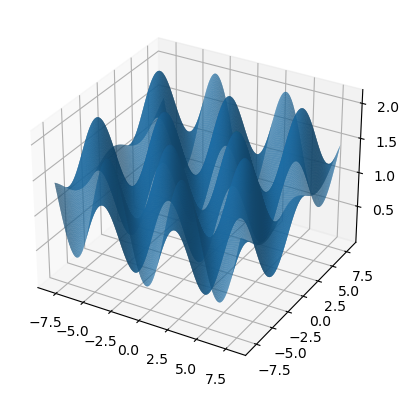

In [64]:

def griewank(x):
  result_sum = 0
  result_prod = 1
  for i in range(len(x)):
    result_sum += ((x[i]**2) / 400)
    result_prod = result_prod * np.cos(x[i]/sqrt(i+1))
  return result_sum - result_prod + 1

# Generar datos para la grafica
X = np.linspace(-8, 8, 400)
Y = np.linspace(-8, 8, 400)
X, Y = np.meshgrid(X, Y)
Z = griewank([X,Y])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
   linewidth=0.08,
  antialiased=True)
plt.show()

In [25]:
size = 3
lower = [-5.0 for x in range(size)] # -2.048
upper = [10.0 for x in range(size)] # 2.048

iterations = 1000

size_swarm = 200
w = 0.5
c1 = 0.2 # intenta regresar
c2 = 0.3 # se acerca al lider
function = ackley
best = pso_algorithm(w, c1, c2, lower, upper, size_swarm, iterations, function)

print('solution ', best.positions, '>>> ', best.fitness)

solution  [-2.4878477327936825e-16, -5.0320421837872707e-17, -3.4621435640385533e-18] >>>  4.440892098500626e-16


In [26]:
lower = [-5.0 for x in range(size)]

In [27]:
lower, upper

([-5.0, -5.0, -5.0], [10.0, 10.0, 10.0])

---

## Using PSO for Linear Regression

---

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("./Salary.csv")

In [10]:
df.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [12]:
df.size

70

Text(0, 0.5, 'Salary')

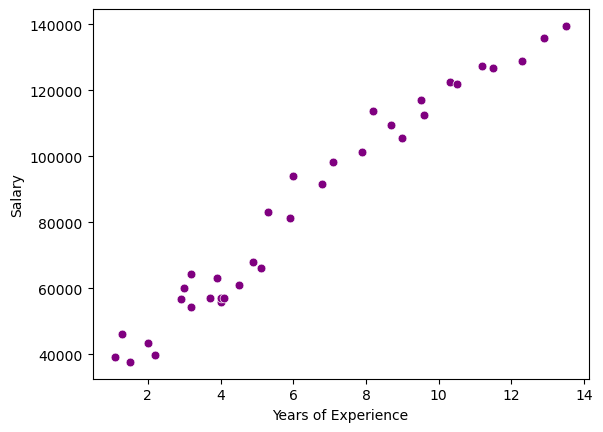

In [20]:
plt.figure()

sns.scatterplot(x = df['YearsExperience'], y = df['Salary'], 
                s = 40, color = 'purple',
                data = df)

plt.xlabel('Years of Experience')
plt.ylabel('Salary')

We are using the Least Square Error method to do so
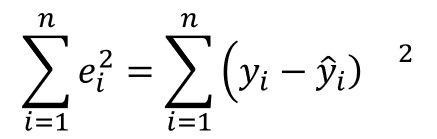

And we are looking for a function that looks like this:
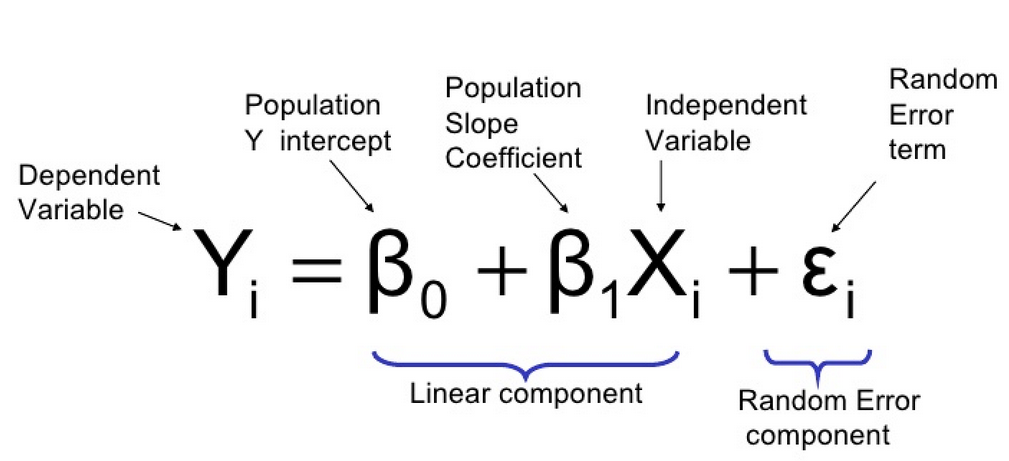

So lets define the function:

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [130]:
class Particle(object):
    def __init__(self):
        self.positions = []
        self.velocities = []
        self.fitness = 0
        
    def set_fitness(self, value):
        self.fitness = value
    
    def validate_bounds(self, lower_bound, upper_bound):
        for i in range(len(self.positions)):
            if self.positions[i] < lower_bound[i] or self.positions[i] > upper_bound[i]:
                self.positions[i] = random.uniform(lower_bound[i], upper_bound[i])

In [131]:
def initialize_swarm(size, lower_bound, upper_bound):
    num_dimensions = len(lower_bound)
    swarm = []
    for _ in range(size):
        particle = Particle()
        for j in range(num_dimensions):
            particle.positions.append(np.random.uniform(lower_bound[j], upper_bound[j]))
            particle.velocities.append(np.random.uniform(lower_bound[j], upper_bound[j]))
        swarm.append(particle)

    
    return swarm

In [139]:
def best_solution(swarm):
    fitness = swarm[0].fitness
    best = swarm[0]
    for particle in swarm:
        if particle.fitness < fitness: # si fuera maximizar sw.fitness > fitness
            best = particle
            fitness = particle.fitness
    
    print(best.positions)
            
    return best

In [140]:
def linear_regression(particle, x):
    return particle[0] + particle[1]*x
        

In [157]:
def least_square_error(particle, df):
    error = 0
    
    for index,row in df.iterrows():
        x = row['YearsExperience']
        y = row['Salary']
        yi = linear_regression(particle, x)
        error += (y - yi)**2
        

    return error
        
    

In [158]:
def evaluate_swarm_linear_regression(swarm, function, df):
    for p in swarm:
        p.fitness = function(p.positions, df) 

In [159]:
def pso_algorithm_linear_regression(w, c1, c2, lower, upper, size_swarm, iterations, function, data_frame):
    dimensions = len(lower)
    #Initialize the swarm
    swarm = initialize_swarm(size_swarm, lower, upper)
    #Evaluate the swarm
    evaluate_swarm_linear_regression(swarm, function, df)

    #print_swarm(x)

    y = swarm[:]
    y_best = best_solution(y)
    #print 'BEST ', y_best.X, '>>> ', y_best.fitness

    it = 0
    while it < iterations: #la mejor y la peor sean muy parecidas
        for i in range(len(swarm)): # x es el swarm
            particle = swarm[i]
            for j in range(dimensions):
                #Calcular la velocidad
                r1 = np.random.rand() # uniform random number r1
                r2 = np.random.rand() # uniform random number r2
                particle.velocities[j] = w * particle.velocities[j] + c1 * r1 * (y[i].positions[j] - particle.positions[j]) + c2 * r2 * (y_best.positions[j] - particle.positions[j])
                #Actualizar la posicion de particle.X
                particle.positions[j] = particle.positions[j] + particle.velocities[j]

            particle.validate_bounds(lower, upper)
                
            #Evaluar la nueva posicion de X
            particle.fitness = function(particle.positions, data_frame)
            
#           # particular
            if particle.fitness < y[i].fitness:
                y[i] = particle
            
            # Global
            if particle.fitness < y_best.fitness:
        
                y_best = particle

            #print 'solution ', y_best.X, '>>> ', y_best.fitness
            swarm[i] = particle
        
        it +=1

    return y_best

In [162]:
size = 2
lower = [0, 0] # -2.048
upper = [50000, 140000] # 2.048

iterations = 100

size_swarm = 1000
w = 0.5
c1 = 0.2 # intenta regresar
c2 = 0.3 # se acerca al lider
function = least_square_error
best = pso_algorithm_linear_regression(w, c1, c2, lower, upper, size_swarm, iterations, function, df)

print('solution ', best.positions, '>>> ', best.fitness)

[26247.525870585152, 9219.859779360848]
solution  [28859.52619390434, 8731.941046070231] >>>  1225236886.7795606


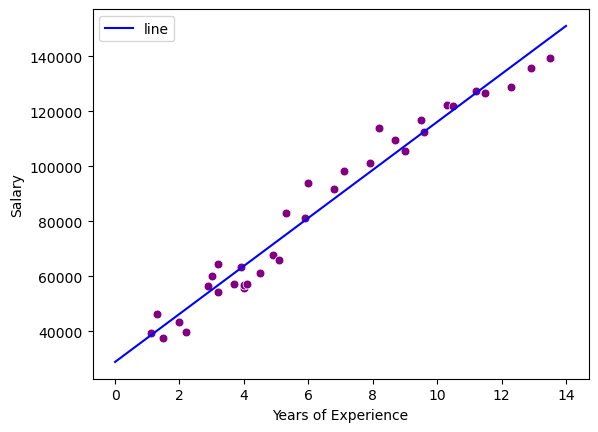

In [163]:
# Plot
x = np.linspace(0,14, 10)
y = linear_regression(best.positions, x)

plt.figure()
plt.plot(x, y, color='blue', label='line')
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'], 
                s = 40, color = 'purple',
                data = df)

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()